<a href="https://colab.research.google.com/github/xwang049/American-Options-Pricing-using-the-Longstaff-Schwartz-Algorithm/blob/main/MonteCarlo%26Longstaff_Schwartz_AmericanOptionsPricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install   aleatory


In [ ]:
!apt-get install -y texlive-full

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  aglfn asymptote asymptote-doc biber chktex cm-super cm-super-minimal context context-modules
  cups-bsd cups-client cups-common dvidvi dvipng dvisvgm feynmf fonts-adf-accanthis
  fonts-adf-berenis fonts-adf-gillius fonts-adf-universalis fonts-arphic-bkai00mp
  fonts-arphic-bsmi00lp fonts-arphic-gbsn00lp fonts-arphic-gkai00mp fonts-arphic-uming
  fonts-baekmuk fonts-cabin fonts-cantarell fonts-comfortaa fonts-croscore fonts-crosextra-caladea
  fonts-crosextra-carlito fonts-dejavu-core fonts-dejavu-extra fonts-droid-fallback
  fonts-ebgaramond fonts-ebgaramond-extra fonts-font-awesome fonts-freefont-otf fonts-freefont-ttf
  fonts-gfs-artemisia fonts-gfs-baskerville fonts-gfs-bodoni-classic fonts-gfs-complutum
  fonts-gfs-didot fonts-gfs-didot-classic fonts-gfs-gazis fonts-gfs-neohellenic fonts-gfs-olga
  fonts-gfs-porson fonts-gfs-solomos

In [ ]:
import numpy as np
from ipywidgets import interact, IntSlider
from aleatory.processes import GBM
from aleatory.utils.utils import draw_paths

%config InlineBackend.figure_format ='retina'

import matplotlib.pyplot as plt
my_style = "https://raw.githubusercontent.com/quantgirluk/matplotlib-stylesheets/main/quant-pastel-light.mplstyle"
plt.style.use(my_style)
plt.rcParams["figure.figsize"] = (12, 7)
plt.rcParams["figure.dpi"] = 100

In [ ]:
r = 0.02
sigma = 0.15
x0 = 1.0
T = 6
N = 50
n = 20*6
gbm = GBM(initial=x0, drift=r, volatility=sigma, T=T)
paths = gbm.simulate(n=n, N=N) # N paths, with n points

In [ ]:
times = gbm.times
expectations = gbm.marginal_expectation(times)
marginalT = gbm.get_marginal(5.0)
# X = np.stack(paths, axis=1)
# draw_paths(times=times, paths=paths, N=N, expectations=expectations, marginalT=marginalT, marginal=True)
# plt.show()

In [22]:
times[-1] #0-6 平分120

6.0

In [ ]:
X = np.stack(paths, axis=1)

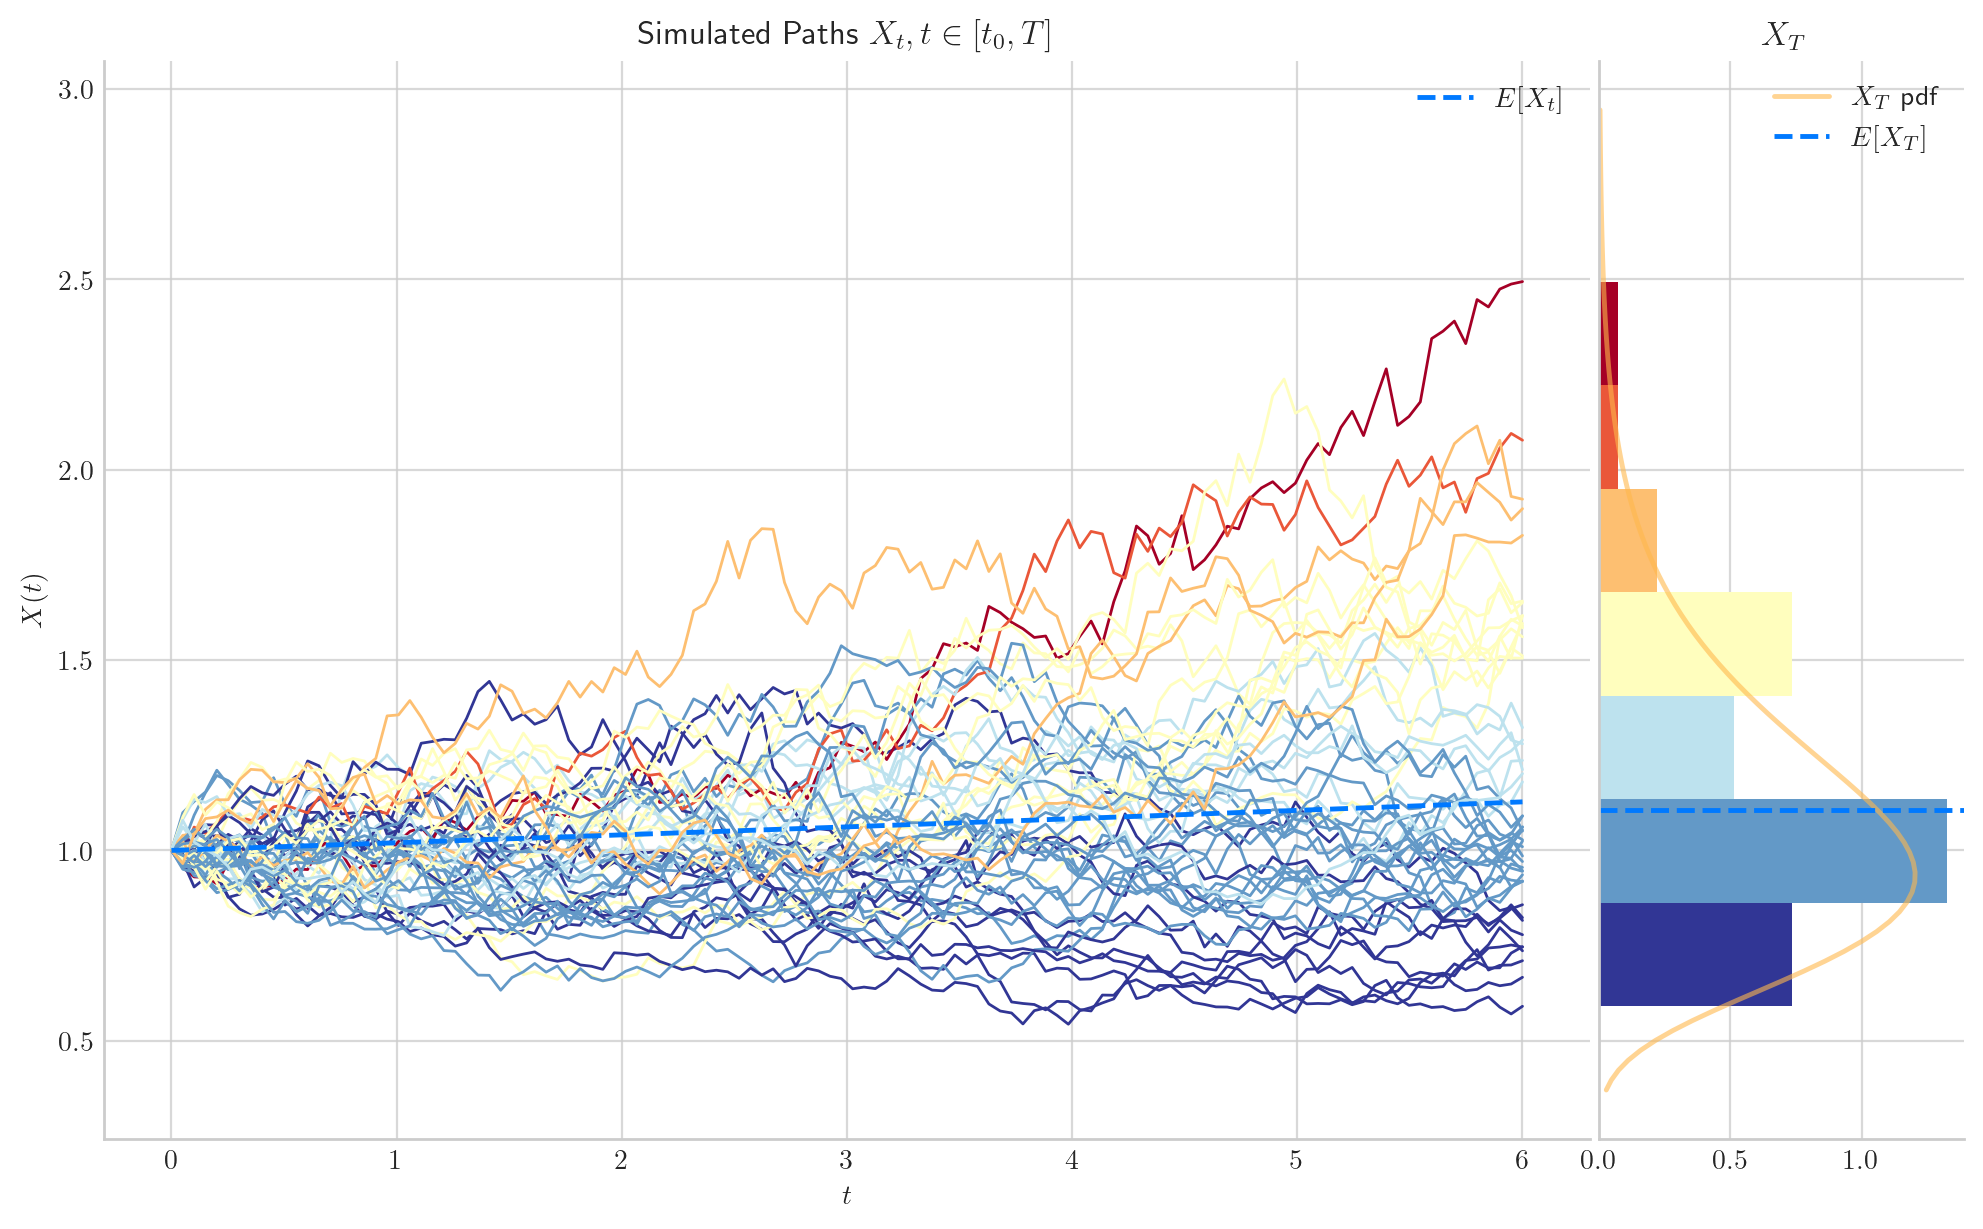

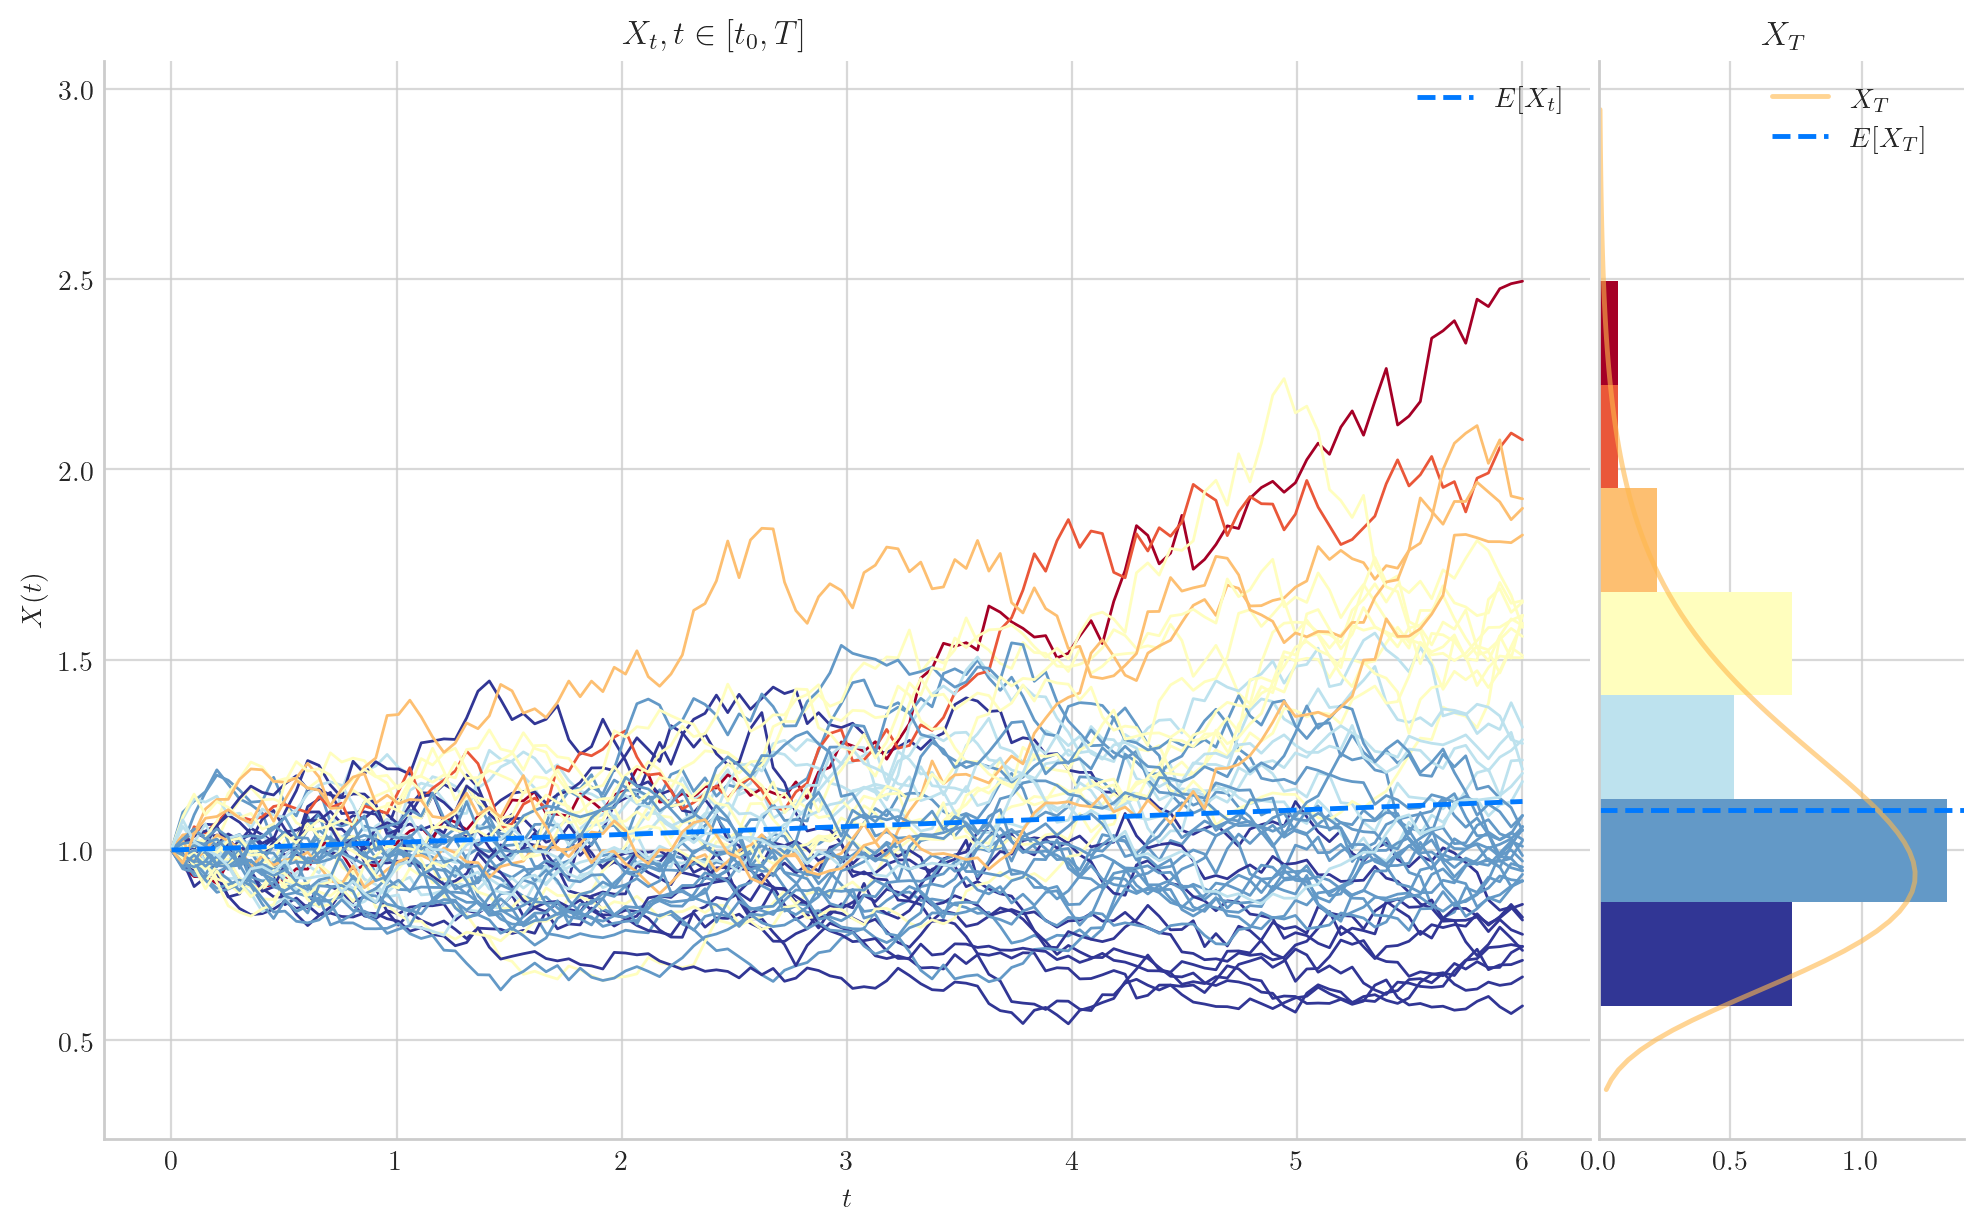

In [ ]:
draw_paths(times=times, paths=paths, N=N, expectations=expectations, marginalT=marginalT, marginal=True)

In [ ]:
plt.show()

American Option Contract

In [ ]:
K = 1.1

In [ ]:
len(paths) #50条随机路线，六个月的交易点

50

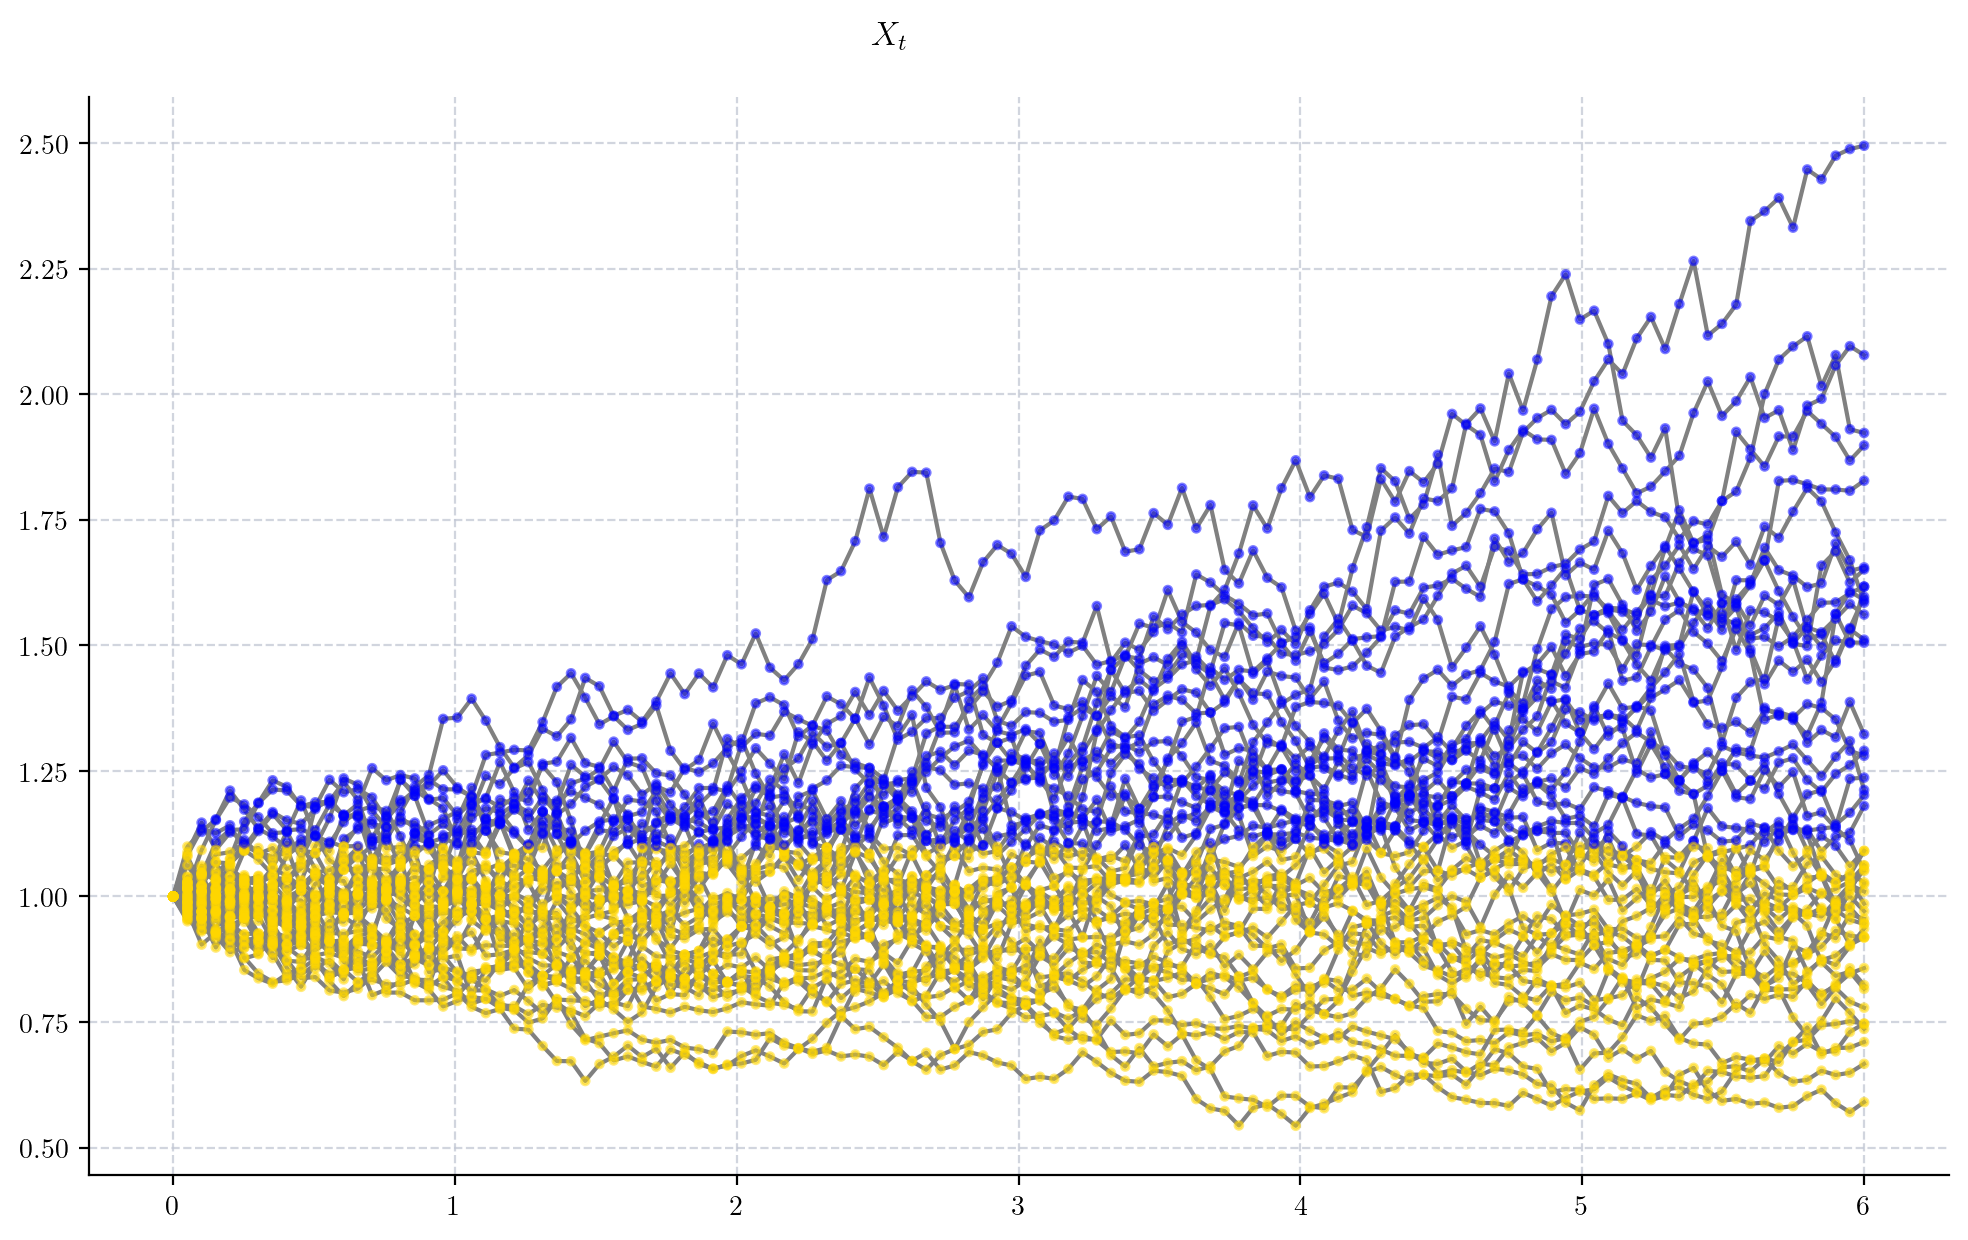

In [ ]:
for path in paths:
  colors = ['gold' if (x<K) else 'blue' for x in path]
  plt.plot(times, path, color = "gray")
  plt.scatter(times, path, c=colors, s=8,zorder=3, alpha = 0.5)

plt.title("simulated Paths $X_t$\n Gold when ITM, Blue otherwise")
plt.show()

ITM: in the money, 可以获得正的payoff

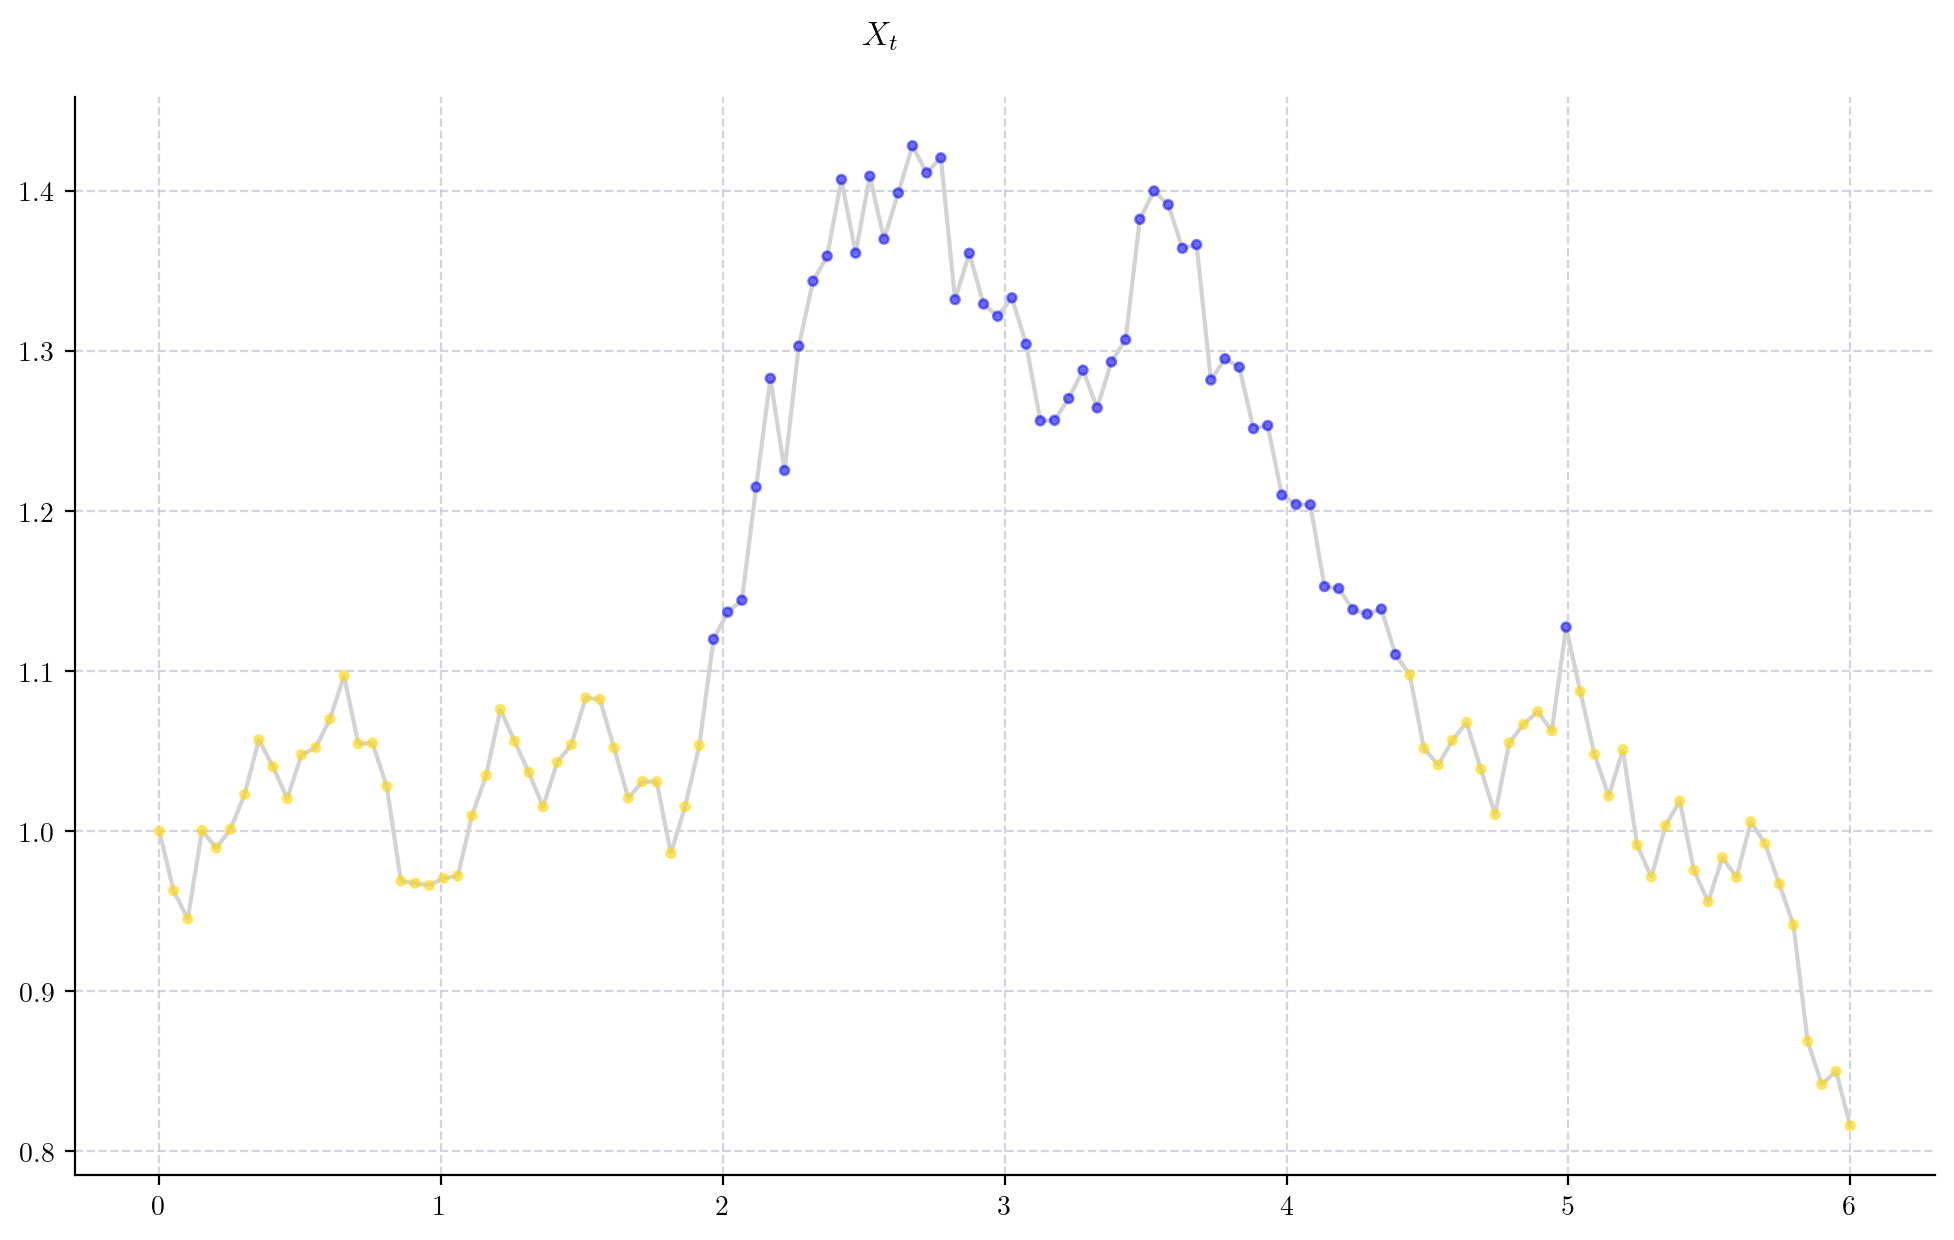

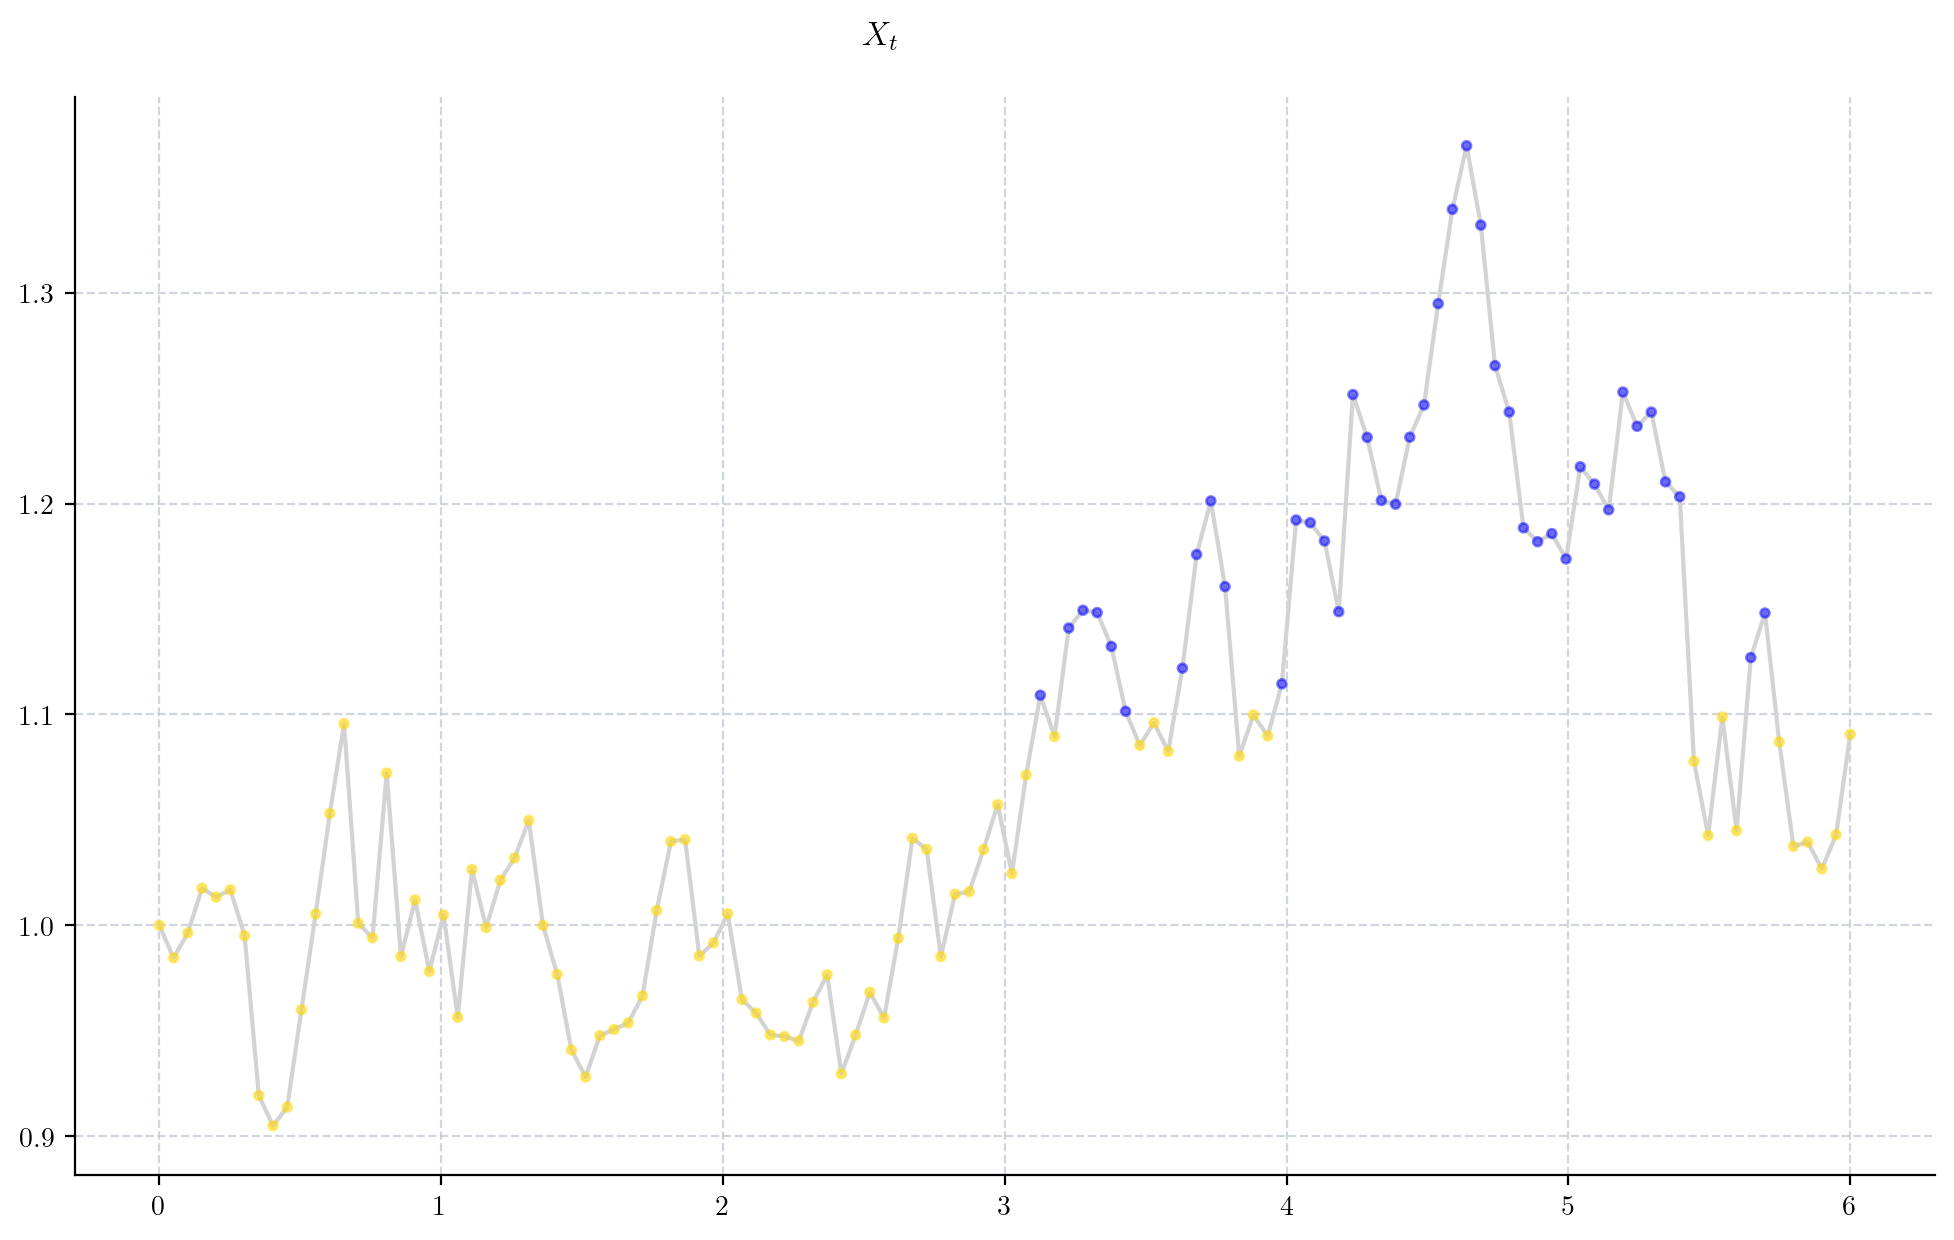

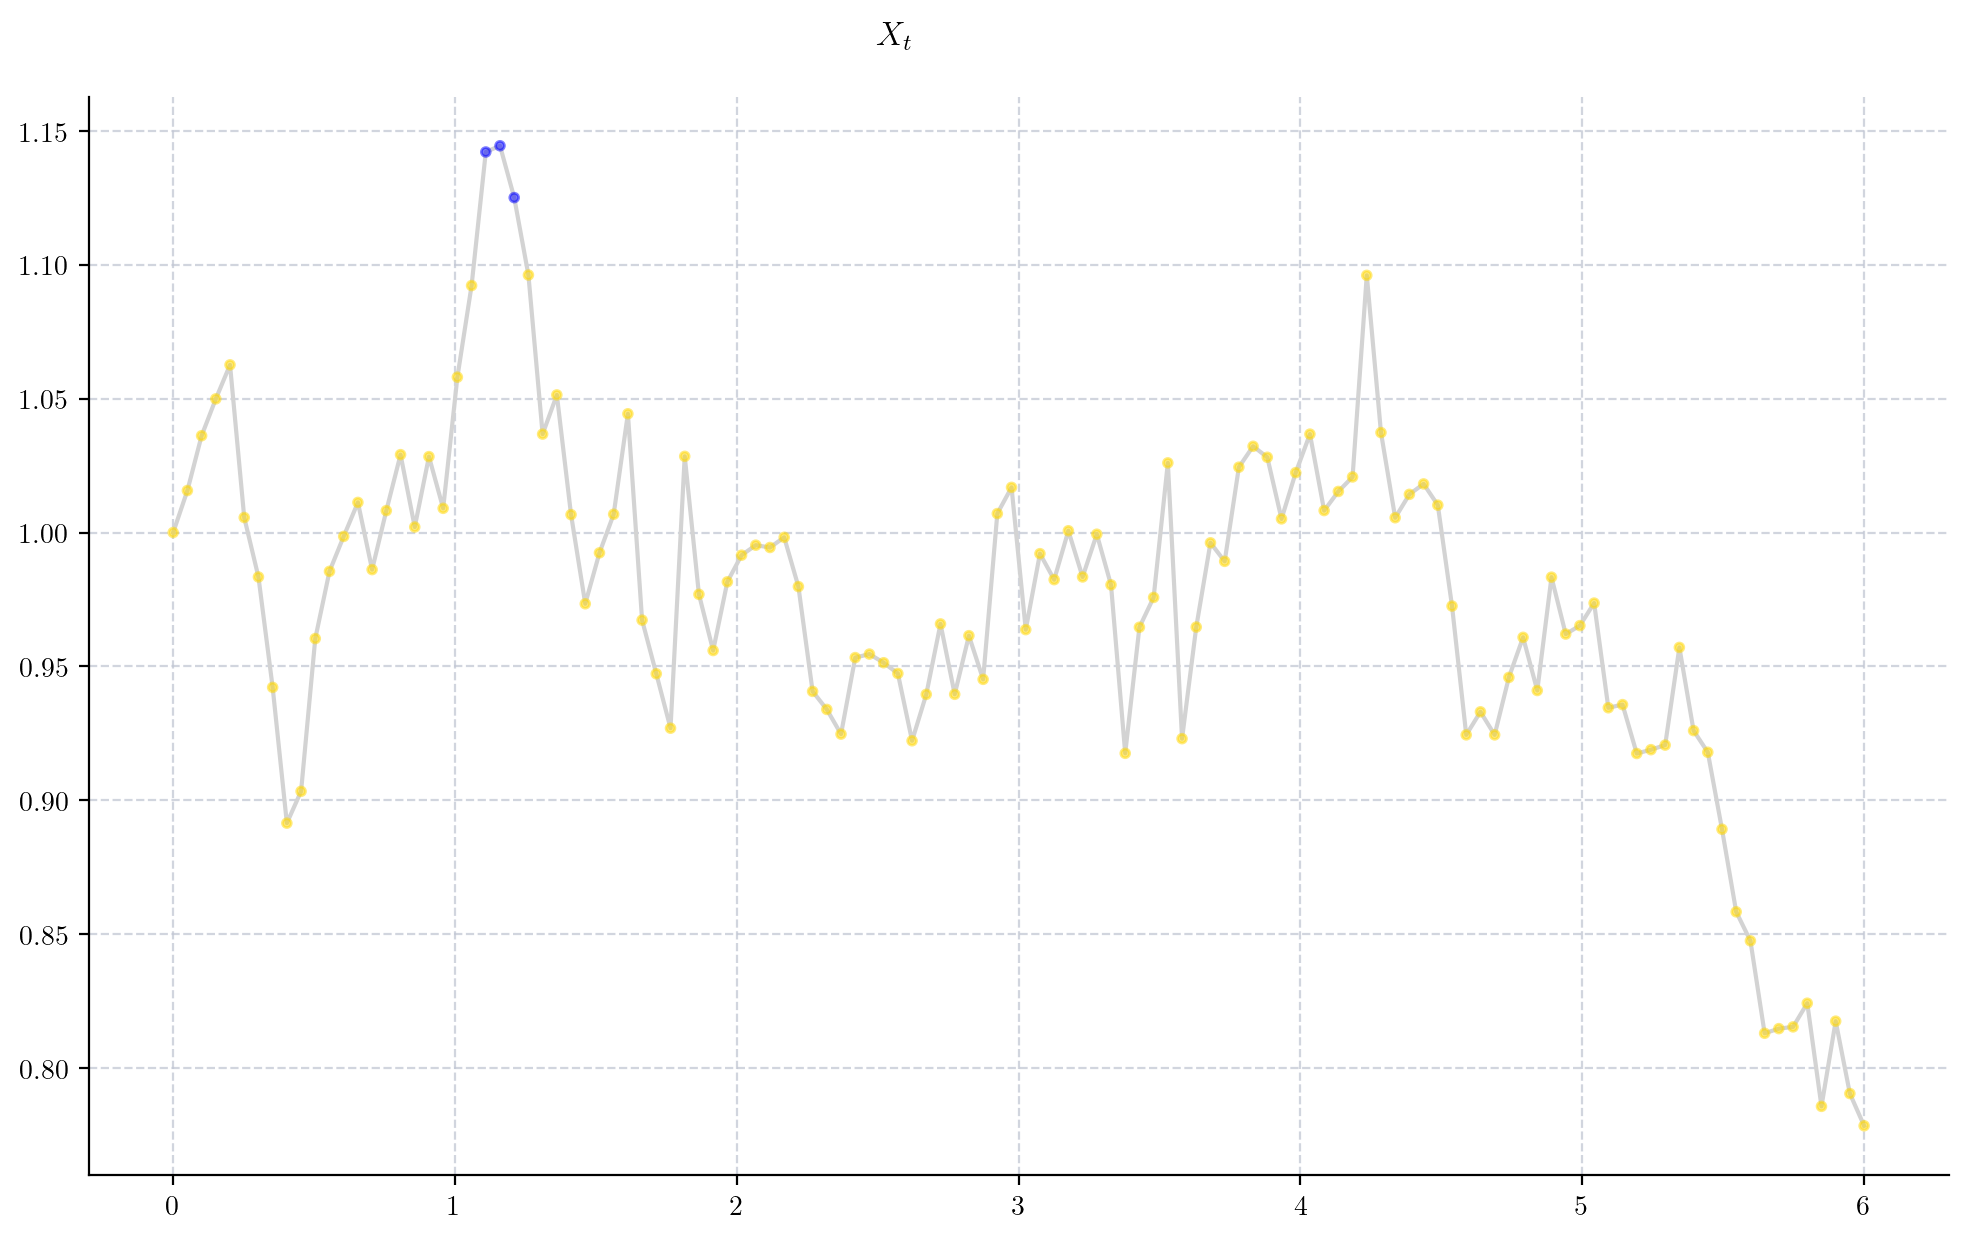

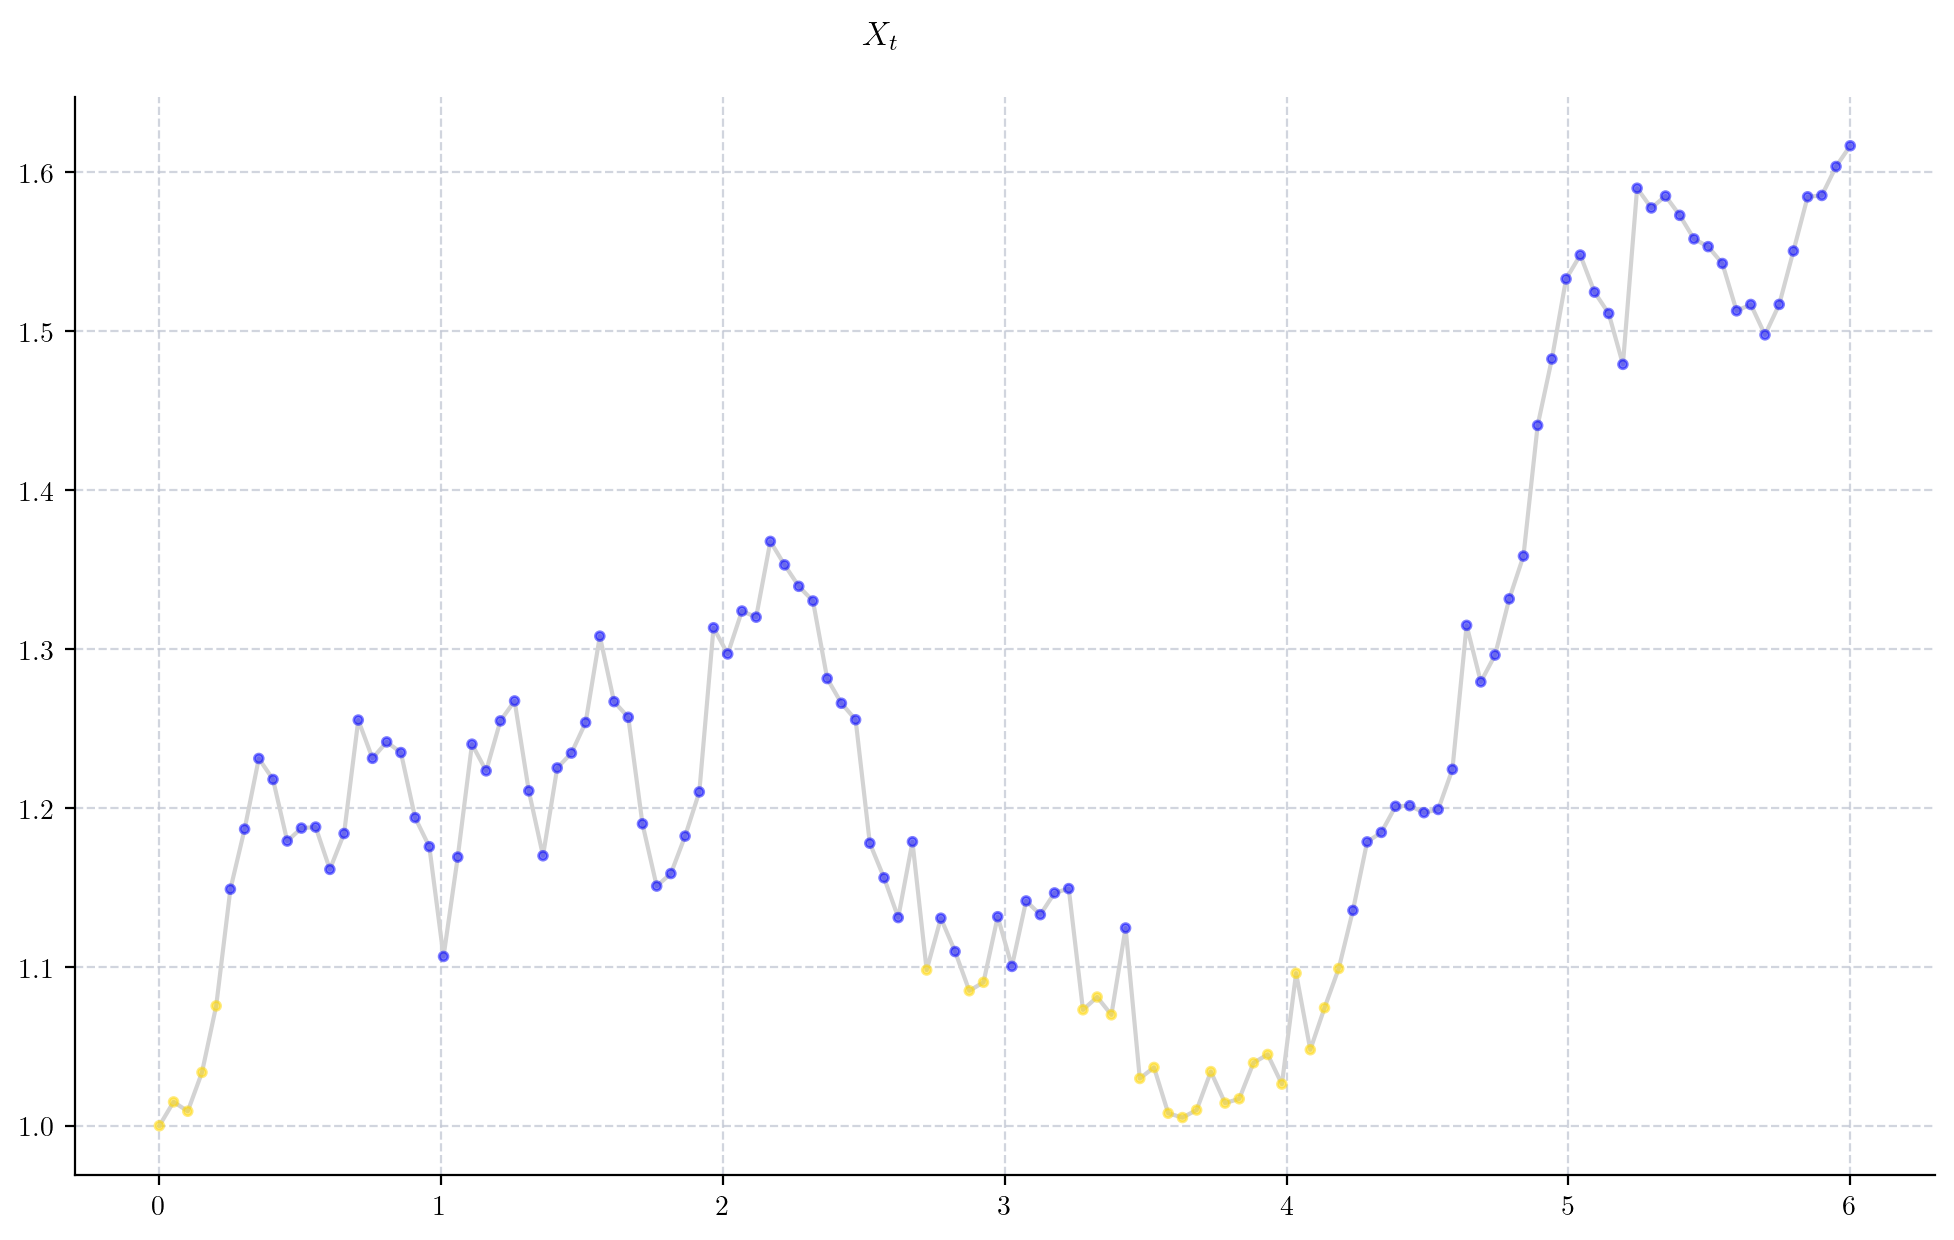

In [ ]:
for path in [paths[0], paths[10], paths[20], paths[30]]:
  colors= ['gold' if (x<K) else 'blue' for x in path]
  plt.plot(times, path, color='lightgray')
  plt.scatter(times, path, c=colors, s=10, zorder=3, alpha=0.5)
  plt.title("Simulated Path $X_t$\n Gold when ITM, Blue otherwise")
  plt.show()

In [ ]:
def exercise_value(x):
  return np.maximum(K-x, 0)

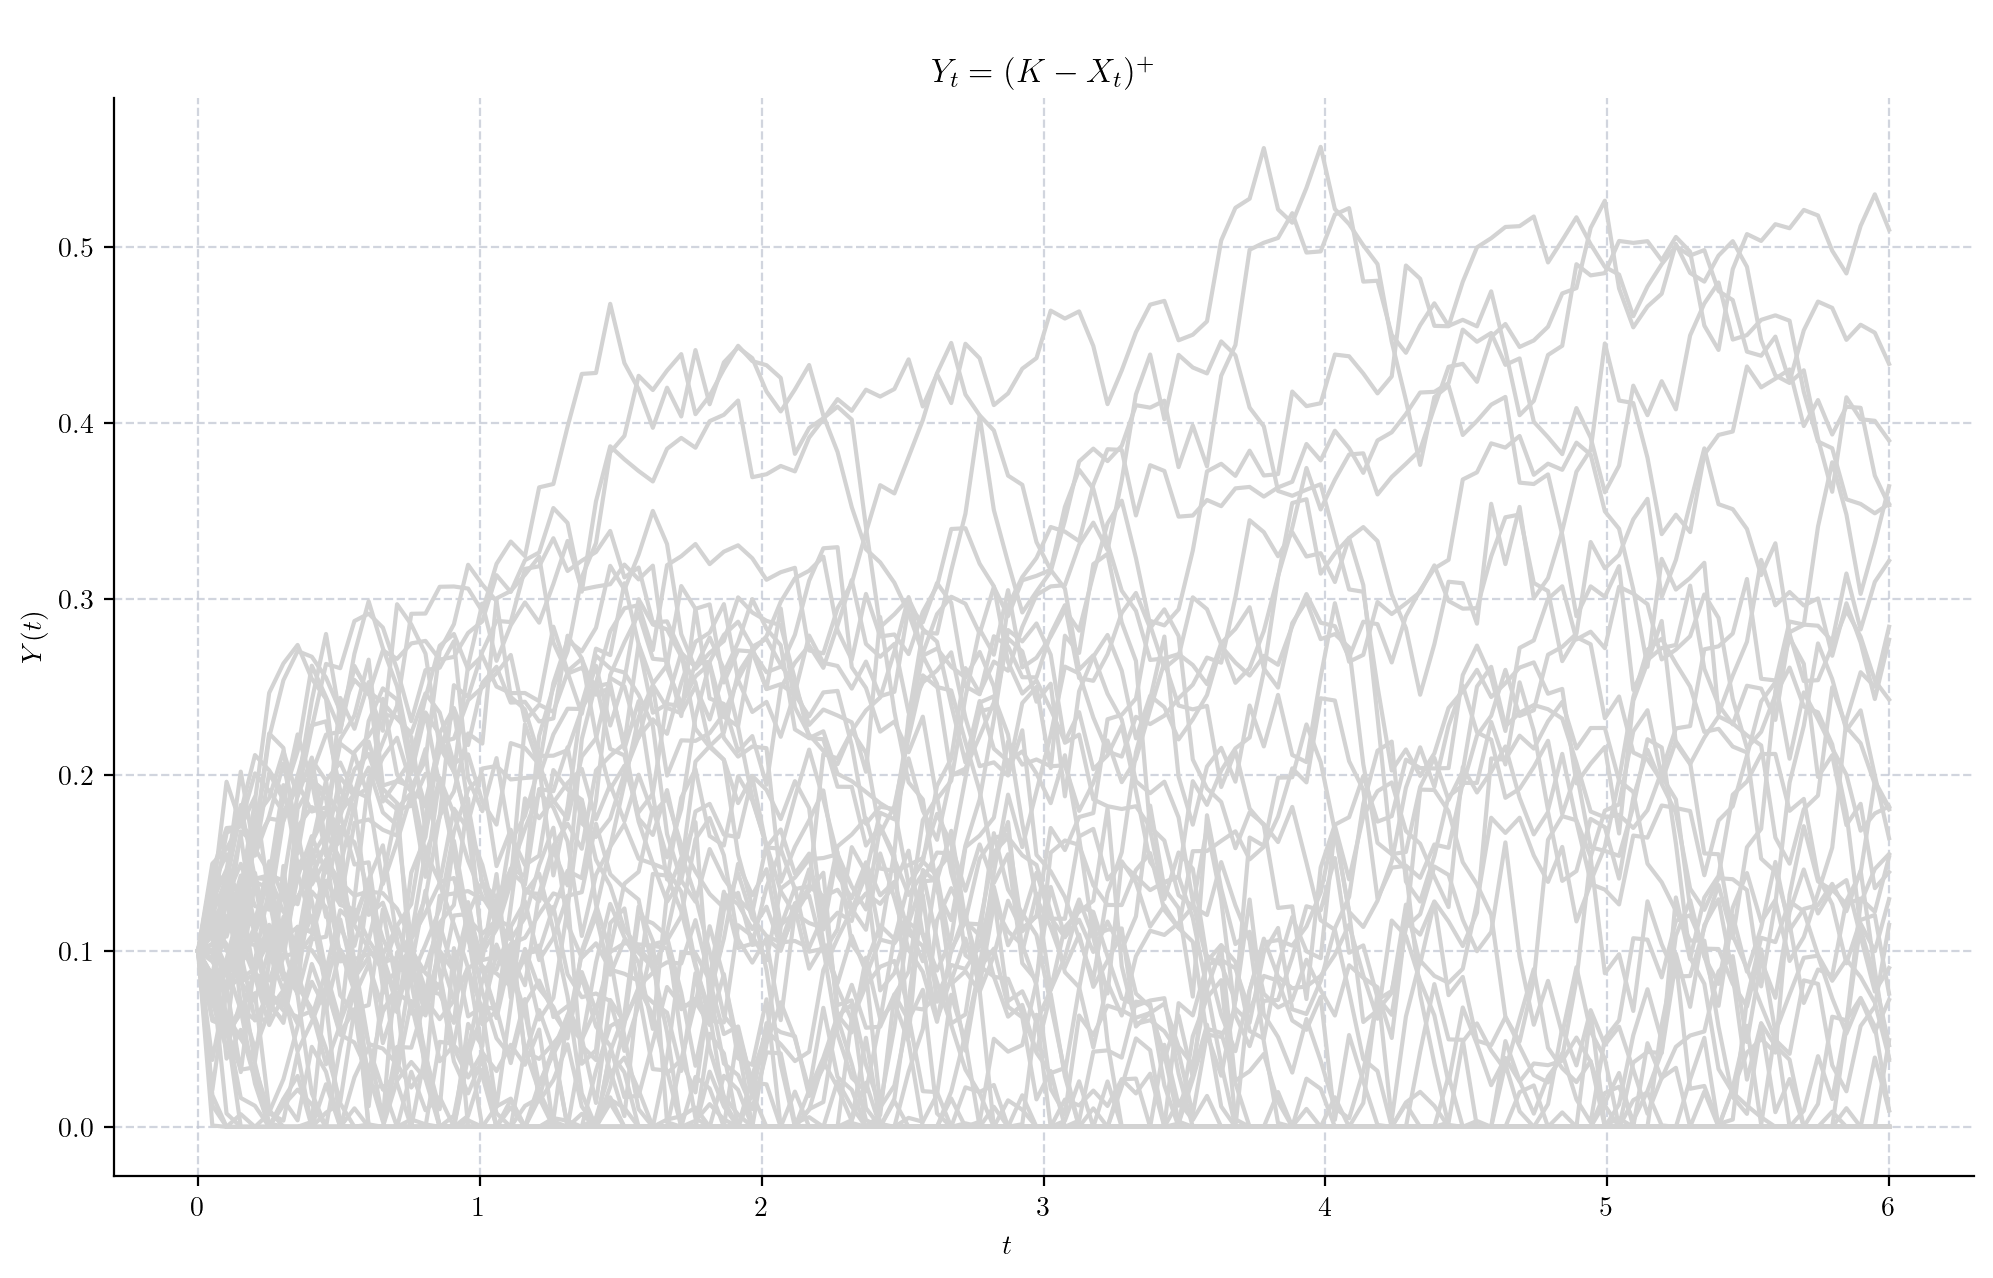

In [ ]:
for path in paths:
  plt.plot(times, exercise_value(path), color= "lightgray")

plt.title("Simulated Payoff\n$Y_t =(K - X_t)^+$")
plt.ylabel("$Y(t)$")
plt.xlabel("Time $t$")
plt.show()

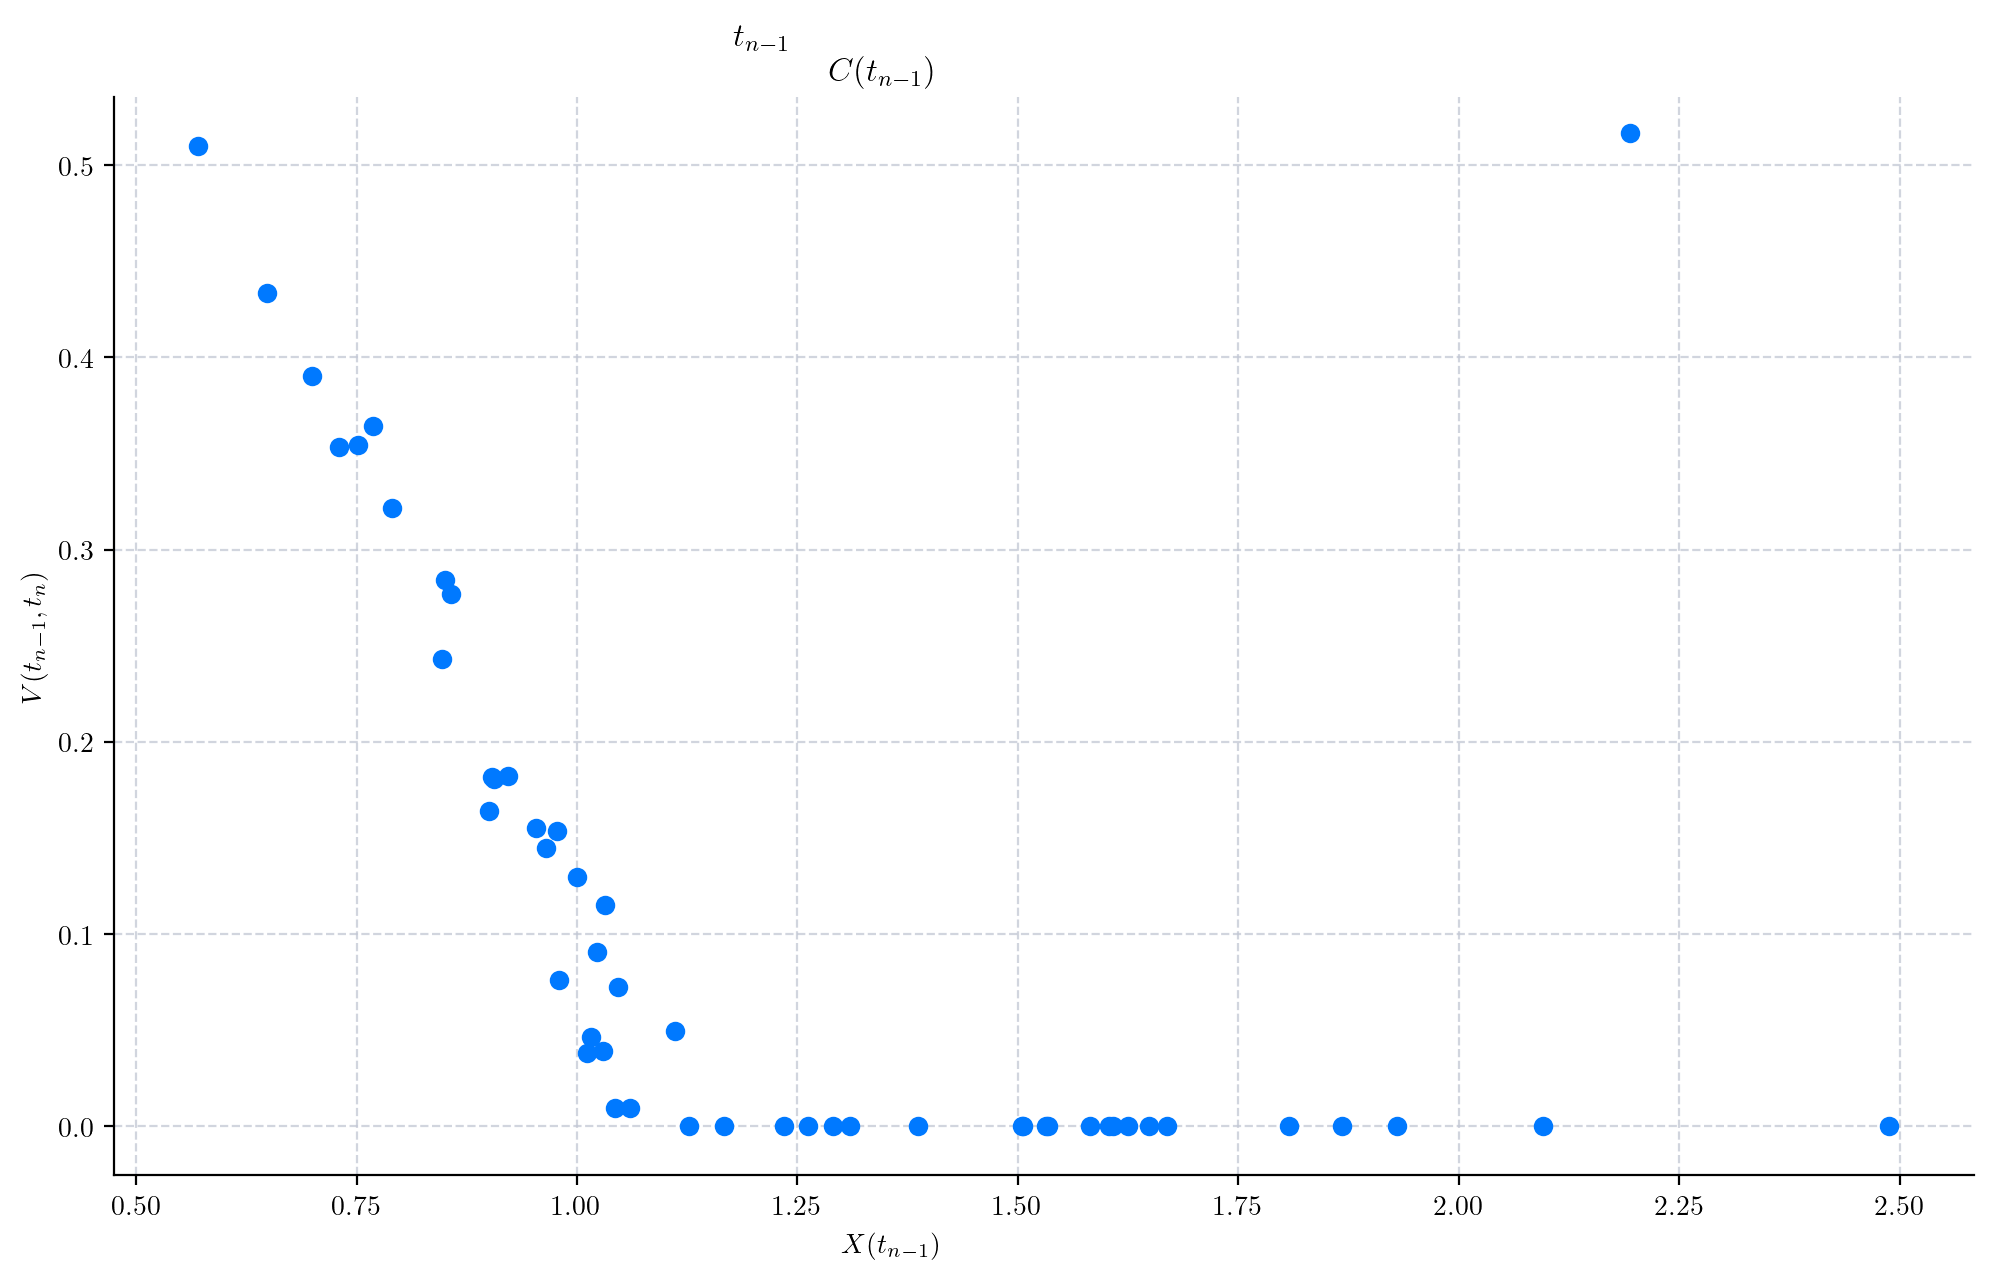

In [ ]:
cashflow = exercise_value(X[-1, :]) * np.exp(-r * (times[-2]- times[-1]))
x = X[-2, :]
plt.figure()
plt.plot(x, cashflow, "o", label="Discounted Cashflow")
plt.ylabel("$V(t_{n-1},t_n)$")
plt.xlabel("Underlying Asset Price $X(t_{n-1})$")
plt.title("At time $t_{n-1}$ we want to approximate the\nContinuation values $C(t_{n-1})$")
plt.legend()
plt.show()

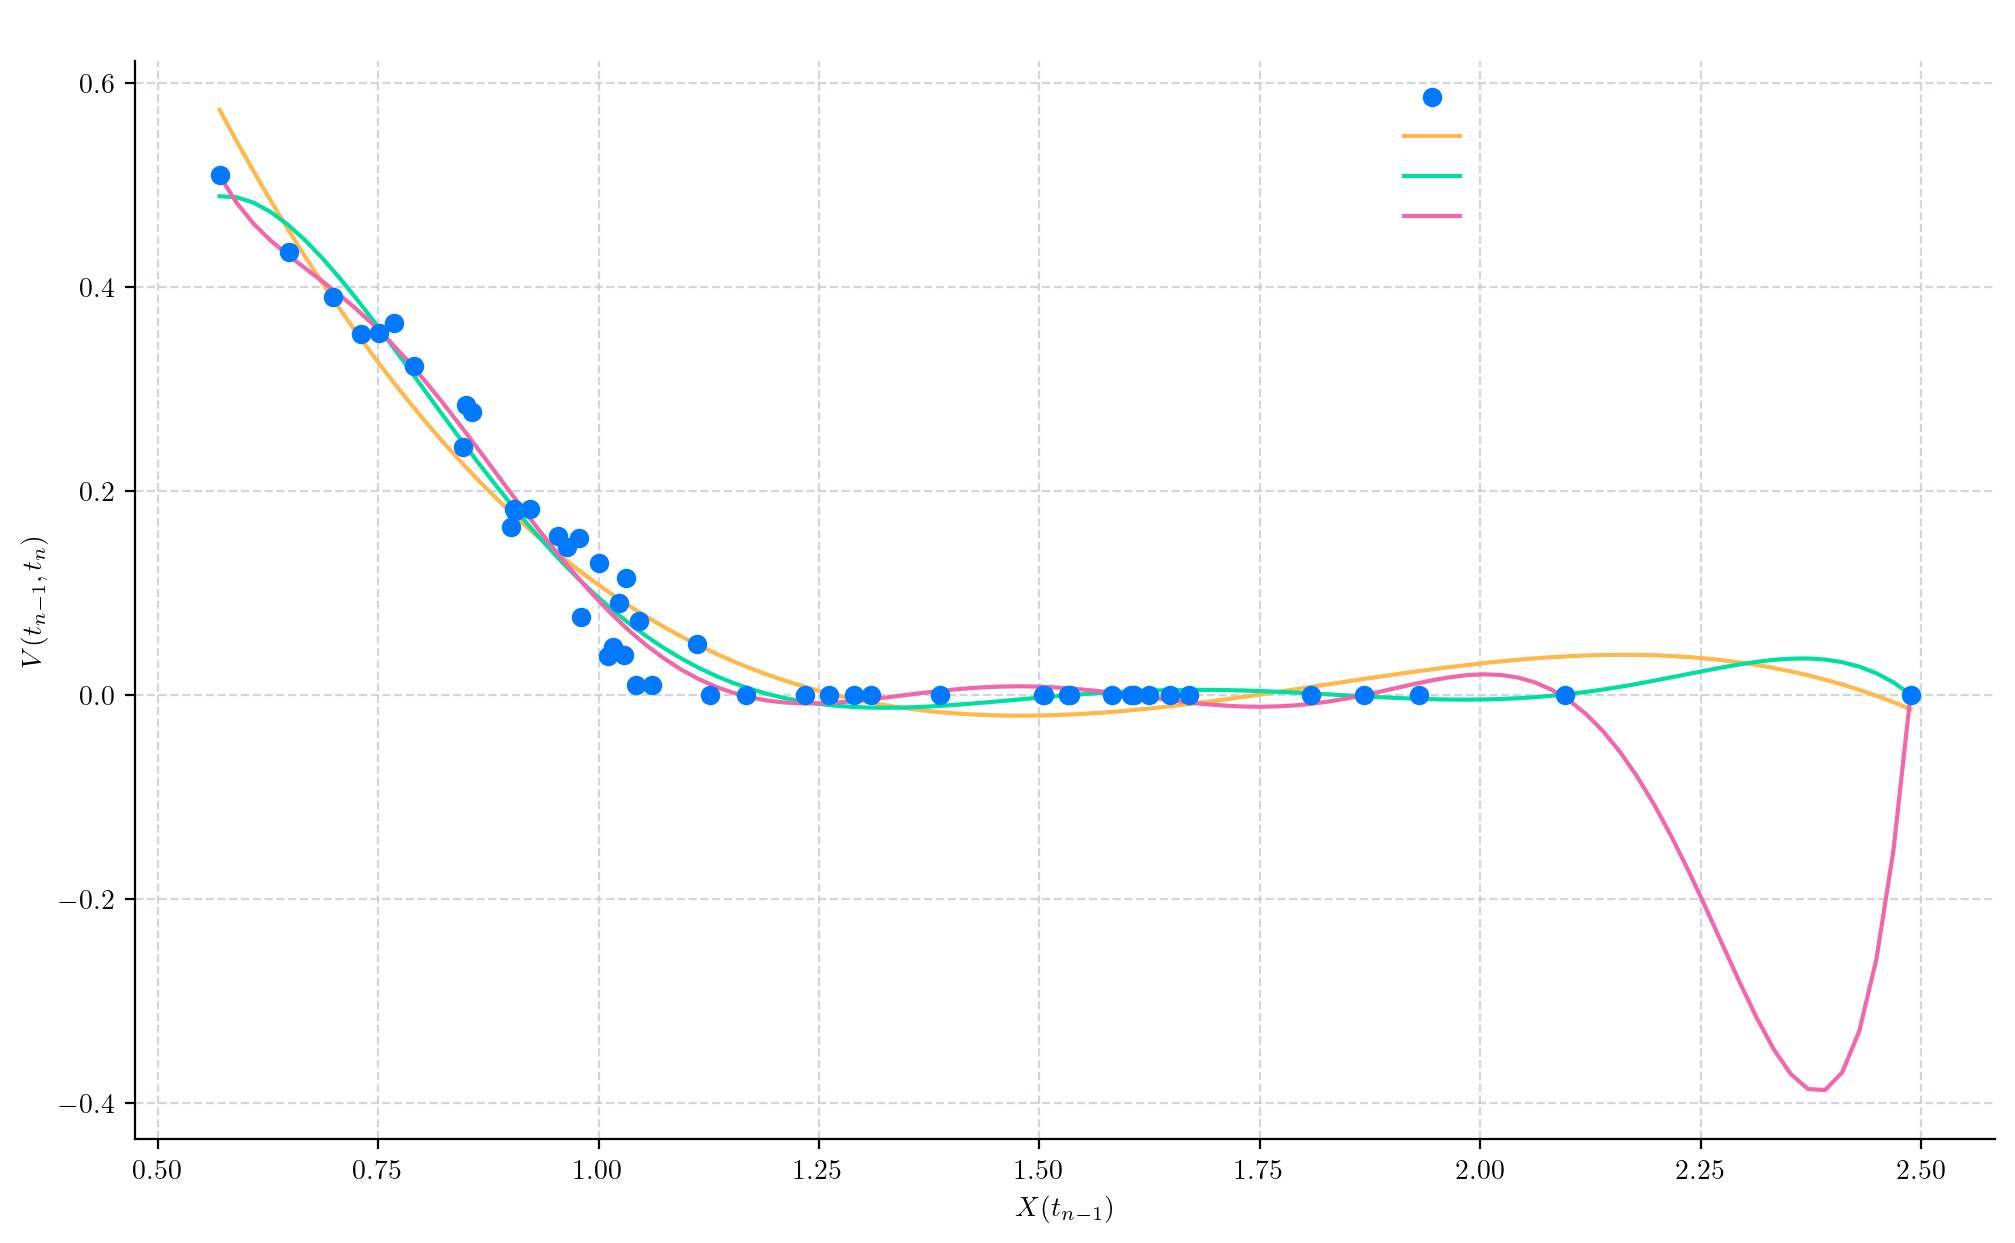

In [23]:
cashflow = exercise_value(X[-1, :]) * np.exp(-r * (times[-2] - times[-1]))
x = X[-2, :]
plt.figure()
plt.plot(x, cashflow,"o",label="discounted cashflow", zorder=3)
fitted=np.polynomial.Hermite.fit(x,cashflow,3)
fitted_laguerre=np.polynomial.Laguerre.fit(x, cashflow,6)
fitted_chebyshev=np.polynomial.Chebyshev.fit(x,cashflow,8)
plt.plot(*fitted.linspace(), label="Fitted Hermite Polynomial (degree 3)")
plt.plot(*fitted_laguerre.linspace(), label="Fitted Laguerre Polynomial (degree 6)")
plt.plot(*fitted_chebyshev.linspace(), label="Chebyshev Polynomial (degree 8)")
plt.xlabel("$X(t_{n-1})$")
plt.ylabel("$V(t_{n-1}, t_n)$")
plt.legend()
plt.title("Let's try fitting different Polynomials")
plt.show()

In [24]:
fitted_chebyshev

Chebyshev([ 0.05847056, -0.31413908,  0.07377186, -0.07425442,  0.03230978,
        0.0808189 ,  0.05019623,  0.0531913 ,  0.03968566], domain=[0.57032719, 2.48794884], window=[-1.,  1.], symbol='x')

In [ ]:
cashflow = exercise_value(X[-1, :]) * np.exp(-r * (times[-2] - times[-1]))
x = X[-2, :]
exercise = exercise_value(x)
fitted = np.polynomial.Polynomial.fit(x, cashflow, 3)
continuation = fitted(x)

fig, axs = plt.subplots(1, 2, figsize=(14,6))
axs[0].plot(x, cashflow, ".", zorder=3)
axs[0].plot(*fitted.linspace(),  color="lightgreen", label="Fitted Polynomial")
axs[0].axvline(x=1.1, linestyle=":", color="purple", label="Strike K")

axs[1].plot(*fitted.linspace(),  color="lightgreen", label="Fitted Polynomial")
axs[1].plot(x, exercise, '.', color="red", label="Exercise")
axs[1].plot(x, continuation, '.', color="green", label= "Approximated Continuation")
axs[1].axvline(x=1.1, linestyle=":", color="purple", label="Strike K")
axs[0].set_xlabel("Underlying Asset Price $X(t_{n-1})$")
axs[0].set_ylabel("Discounted Cashflow")
axs[1].set_xlabel("Underlying Asset Price $X(t_{n-1})$")
axs[1].set_ylabel("Exercise vs Continuation")
axs[0].legend()
axs[1].legend()
plt.suptitle("Approximating Continuation Value\n(Using all Points)")
plt.show()
fitted